# Dealing with inbalanced Dataset

We have a dataset in realisitc proportion, we could oversemple but it will not be good.

We have a lot of IBD events created by Andrea and also a lot of radioactivity events. If we sort them in temporal order we get that there will be a little amount of IBD in all the radioactivity events, because it is more frequently have radioactivity events respect of IBD that are rare. 

So in order to train our ML-algorithm we could use generated IBD events and generated Radioactivity events, so in that cse we have basically the same amount of data and the inbalanced problem will disappear. After the training, we test with inbalaced dataset.

Basically we use a smote 

We will se if it works... -> It worked!

# Loading data

In [286]:
import uproot as up
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn-v0_8-paper')
plt.rcParams["patch.force_edgecolor"] = True

In [287]:
# file_all_features = up.open("Data/all_feature.root")
# all_feature = file_all_features['all_feature'].arrays(library = 'np')

In [288]:
file_features = "../../../../mnt/fcufino/all_features_IBD_U.csv"

In [289]:
all_feature_IBD_He = pd.read_csv(file_features)
# all_feature_IBD_Li = pd.read_csv("../../../../mnt/fcufino/all_features_IBD_Li.csv")
# all_feature_IBD_Th = pd.read_csv("../../../../mnt/fcufino/all_features_IBD_Th.csv")
# all_feature_IBD_U = pd.read_csv("../../../../mnt/fcufino/all_features_IBD_U.csv")

## Checking the dataset size

# Balancing the dataset

In [290]:
print("BKG: ", all_feature_IBD_He["delta_time"][all_feature_IBD_He['Label']==0].shape[0])
print("IBD: ", all_feature_IBD_He["delta_time"][all_feature_IBD_He['Label']==1].shape[0]) 

BKG:  39578
IBD:  49277


Sotto per mostrare che nel dataset BKG NON ci sono anche IBD non correlati

In [291]:
print(all_feature_IBD_He['Source'][all_feature_IBD_He["Label"]==0].unique())

[0.]


In [292]:
for key in all_feature_IBD_He.keys():
    print(key)
print(all_feature_IBD_He.keys())

R_prompt
E_del
delta_radius
R_delayed
Label
E_pro
delta_time
Source
Index(['R_prompt', 'E_del', 'delta_radius', 'R_delayed', 'Label', 'E_pro',
       'delta_time', 'Source'],
      dtype='object')


In [293]:
# Elimina gli elementi desiderati dal dataset
num_IBD = all_feature_IBD_He["delta_time"][all_feature_IBD_He['Label']==1].shape[0]
num_BKG = all_feature_IBD_He["delta_time"][all_feature_IBD_He['Label']==0].shape[0]

del_BKG = 0
del_IBD = 0

if num_IBD > num_BKG:
    del_IBD = num_IBD - num_BKG
    to_del_ibd = all_feature_IBD_He.shape[0] - del_IBD
    order = np.argsort(all_feature_IBD_He["Label"])
    all_feature = all_feature_IBD_He.iloc[order].dropna()
    all_feature = all_feature.iloc[:to_del_ibd]

elif num_IBD < num_BKG:
    del_BKG = num_BKG - num_IBD
    order = np.argsort(all_feature_IBD_He["Label"])
    all_feature = all_feature_IBD_He.iloc[order].dropna()
    all_feature = all_feature.iloc[del_BKG:]

print("BKG:", num_BKG - del_BKG) 
print("IBD:", num_IBD - del_IBD)

BKG: 39578
IBD: 39578


# Plots

In [294]:
print(np.logical_and(all_feature["Label"] == 0 , True).sum())
print(np.logical_and(all_feature["Label"] == 1 , True).sum())

39578
39578


In [295]:
all_feature_IBD_He[all_feature_IBD_He['Label']==0].describe()

,R_prompt,E_del,delta_radius,R_delayed,Label,E_pro,delta_time,Source
count,39578.000000,39578.000000,39578.000000,39578.000000,39578.0,39578.000000,3.957800e+04,39578.0
mean,13224.381919,2.259527,502.954968,13220.279341,0.0,1.633463,2.328664e+05,0.0
std,3405.288726,0.343463,1321.043815,3403.900350,0.0,0.447539,1.988174e+05,0.0
min,453.667511,0.217762,7.967504,604.222290,0.0,0.393128,1.024000e+03,0.0
25%,11109.026123,2.203555,224.834515,11100.544922,0.0,1.253131,6.553600e+04,0.0
50%,13998.007324,2.241376,352.353470,13987.709473,0.0,1.531161,1.802240e+05,0.0
75%,16016.805664,2.278719,545.705292,16008.484619,0.0,2.036213,3.276800e+05,0.0
max,17400.001953,11.293560,31366.388672,17400.001953,0.0,3.499223,1.097728e+06,0.0


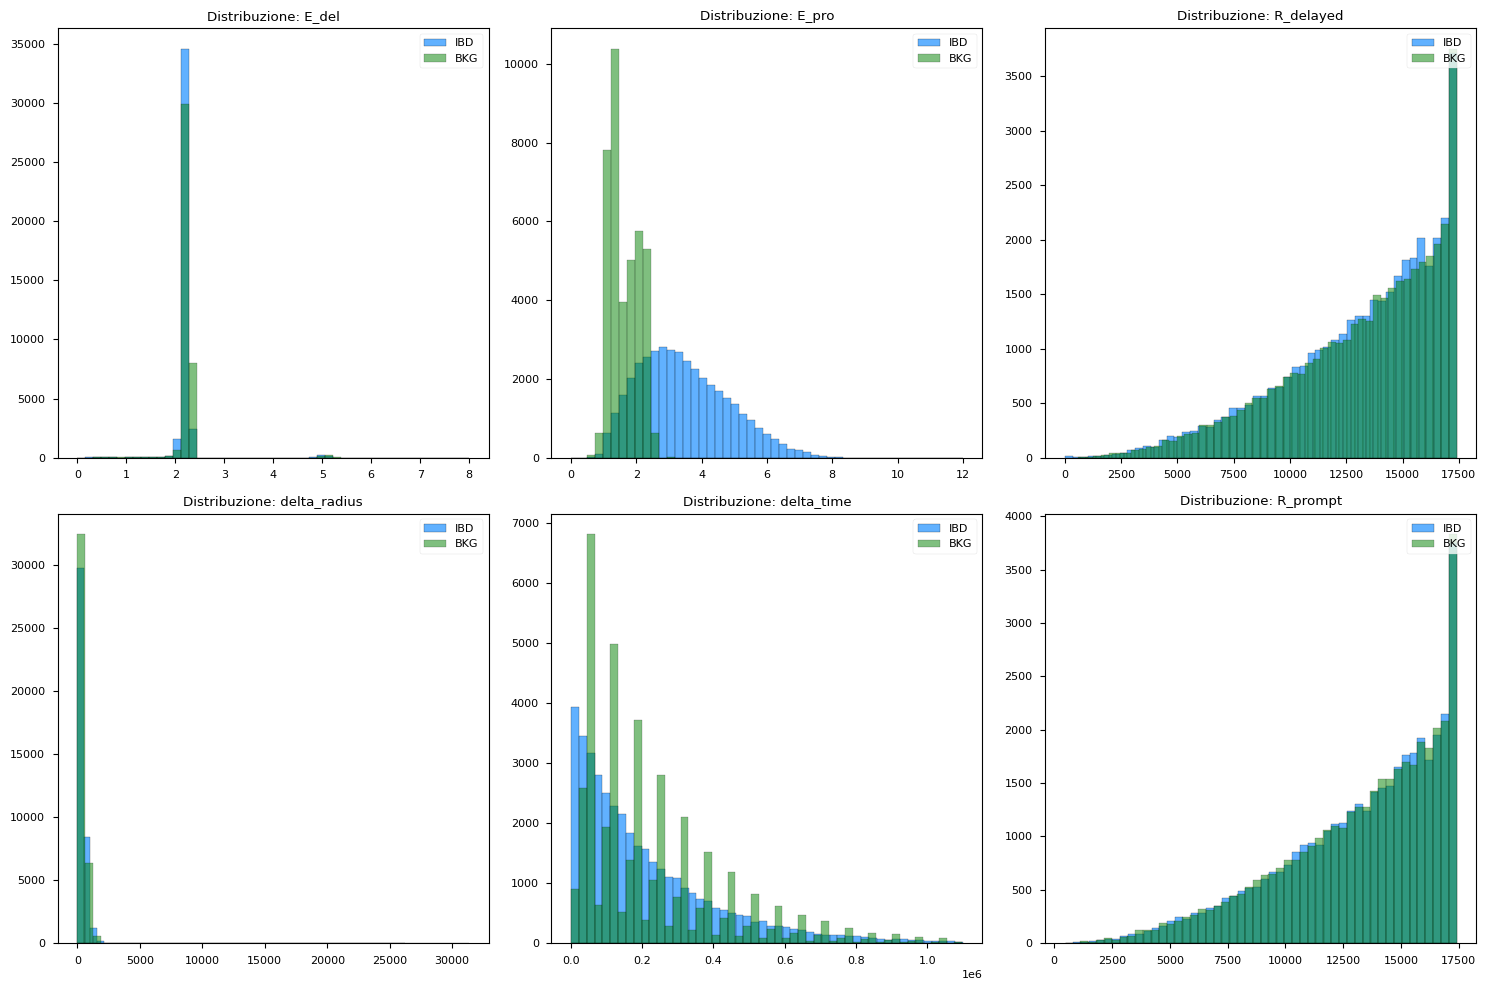

In [318]:
features = ['E_del',"E_pro","R_delayed","delta_radius","delta_time","R_prompt"]
# Definisci le dimensioni della griglia dei subplot
num_rows = 2  # Numero di righe
num_cols = 3  # Numero di colonne

# Crea una figura e una griglia di subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Itera attraverso tutte le features
for idx, feature in enumerate(features):
    # Calcola gli indici della riga e della colonna corrente
    row = idx // num_cols
    col = idx % num_cols

    # Seleziona l'asse corrispondente alla riga e alla colonna corrente
    ax = axes[row, col] if num_rows > 1 else axes[col]
    
    if feature == "E_del":
        ax.hist(all_feature[feature][all_feature['Label'] == 1],np.linspace(0,8,50), color='dodgerblue',alpha = 0.7, label='IBD')
        ax.hist(all_feature[feature][all_feature['Label'] == 0],np.linspace(0,8,50), color='green',alpha = 0.5, label='BKG')
    
    elif feature == "E_pro":
        ax.hist(all_feature[feature][all_feature['Label'] == 1],np.linspace(0,12,50), color='dodgerblue',alpha = 0.7, label='IBD')
        ax.hist(all_feature[feature][all_feature['Label'] == 0],np.linspace(0,12,50), color='green',alpha = 0.5, label='BKG')
    else:
        ax.hist(all_feature[feature][all_feature['Label'] == 1],bins=50, color='dodgerblue',alpha = 0.7, label='IBD')
        ax.hist(all_feature[feature][all_feature['Source'] == 0],bins=50, color='green',alpha = 0.5, label='BKG')
    

 
    ax.set_title(f'Distribuzione: {feature}')
    ax.legend(loc='upper right')
    

plt.tight_layout()
plt.show()

# ML Classification Algorithms

## Creating train and test datasets

Tolgo delta time perchè ha il problema del timestamp e credo che 

In [319]:
from sklearn.model_selection import train_test_split


columns_to_exclude = ['Label', 'Source', 'delta_time']


X = all_feature.drop(columns_to_exclude, axis=1)
Y = all_feature['Label']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

## XGBClassifier

In [320]:
from sklearn.metrics import roc_auc_score
import time
import xgboost as xgb

In [299]:
from sklearn.metrics import accuracy_score
import os
import xgboost as xgb

scale_pos_weight = (len(all_feature['Label'])-all_feature['Label'].sum())/all_feature['Label'].sum()

model_path = "xgboost3.model"

# Verifica se il file del modello esiste
if os.path.isfile(model_path):
    # Carica il modello da file
    model = xgb.sklearn.XGBClassifier()
    model.load_model(model_path)
    print("Model loaded")
else:
    # Crea e addestra il modello se il file non esiste
    model = xgb.sklearn.XGBClassifier(nthread=-1, seed=1, n_estimators=200, max_depth=5, learning_rate = 0.05) #, scale_pos_weight = scale_pos_weight)

    eval_set = [(X_train, y_train), (X_test, y_test)]
    model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
    print("Finished training")

    # Salva il modello in file
    model.save_model(model_path)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Calcola l'accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)


[0]	validation_0-error:0.13624	validation_0-logloss:0.66292	validation_1-error:0.13763	validation_1-logloss:0.66298
[1]	validation_0-error:0.13617	validation_0-logloss:0.63557	validation_1-error:0.13763	validation_1-logloss:0.63571
[2]	validation_0-error:0.13521	validation_0-logloss:0.61072	validation_1-error:0.13669	validation_1-logloss:0.61094
[3]	validation_0-error:0.13521	validation_0-logloss:0.58808	validation_1-error:0.13669	validation_1-logloss:0.58835
[4]	validation_0-error:0.13524	validation_0-logloss:0.56735	validation_1-error:0.13669	validation_1-logloss:0.56769


`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[5]	validation_0-error:0.13521	validation_0-logloss:0.54836	validation_1-error:0.13669	validation_1-logloss:0.54877
[6]	validation_0-error:0.13529	validation_0-logloss:0.53092	validation_1-error:0.13662	validation_1-logloss:0.53136
[7]	validation_0-error:0.13535	validation_0-logloss:0.51483	validation_1-error:0.13662	validation_1-logloss:0.51532
[8]	validation_0-error:0.13521	validation_0-logloss:0.50004	validation_1-error:0.13656	validation_1-logloss:0.50052
[9]	validation_0-error:0.13535	validation_0-logloss:0.48633	validation_1-error:0.13662	validation_1-logloss:0.48687
[10]	validation_0-error:0.13518	validation_0-logloss:0.47364	validation_1-error:0.13662	validation_1-logloss:0.47420
[11]	validation_0-error:0.13527	validation_0-logloss:0.46188	validation_1-error:0.13662	validation_1-logloss:0.46249
[12]	validation_0-error:0.13532	validation_0-logloss:0.45096	validation_1-error:0.13662	validation_1-logloss:0.45159
[13]	validation_0-error:0.13529	validation_0-logloss:0.44082	validati

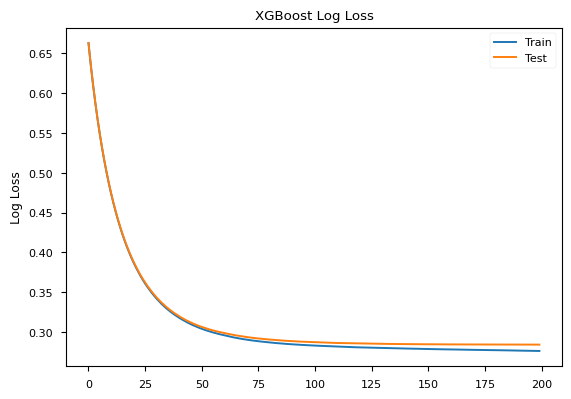

In [321]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

# plot log loss

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')

ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()

plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')

plt.show()


In [322]:
import sklearn
print(sklearn.metrics.classification_report(y_test, y_pred))
sklearn.metrics.confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       0.50      0.61      0.55      7975
         1.0       0.49      0.39      0.44      7857

    accuracy                           0.50     15832
   macro avg       0.50      0.50      0.49     15832
weighted avg       0.50      0.50      0.49     15832



array([[4845, 3130],
       [4794, 3063]])

In [323]:
features_names = [key for key in all_feature.keys() if key!= "Label"]
print(features_names)

['R_prompt', 'E_del', 'delta_radius', 'R_delayed', 'E_pro', 'delta_time', 'Source']


## shap

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


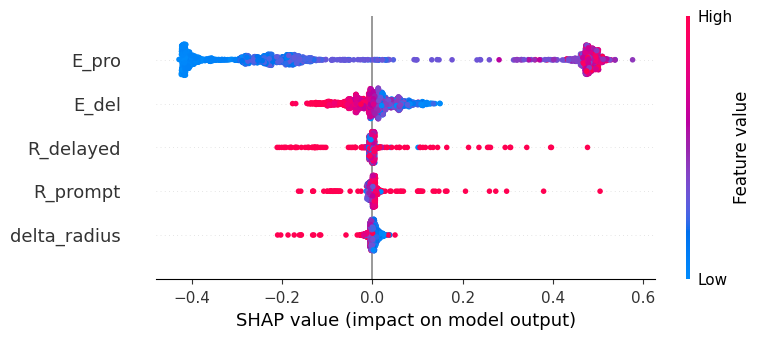

In [324]:
import shap
features_names = X.columns

#Creo un oggetto explainer SHAP
explainer = shap.Explainer(model, X_test[:2000],model_output="probability")

# Calcolo i valori di Shapley per il set di test
shap_values = explainer(X_test[:2000])
 
# Plotto il summary plot di SHAP
shap.summary_plot(shap_values, X_test[:2000], feature_names=features_names);

In [304]:
# shap.plots.bar(shap_values)

### Selezione BDT sul dataset di sola radioattività

In [327]:
all_feature_r = pd.read_csv(file_features)

In [328]:
X_rad_df = all_feature_r[(all_feature_r["Label"] == 0) & (all_feature_r["Source"] == 0)]
X_rad = X_rad_df.drop(['Label', 'Source', 'delta_time'], axis=1)

#Now predict y using model XGBoost thath has been trained
y_rad_pred = model.predict(X_rad)

In [329]:
print(y_rad_pred.sum(), "su", y_rad_pred.shape[0])

TP_bkg = np.logical_and(X_rad_df['Label'] == 0, y_rad_pred == 0)
TN_bkg = np.logical_and(X_rad_df['Label'] == 1, y_rad_pred == 1)
FN_bkg = np.logical_and(X_rad_df["Label"] == 0, y_rad_pred == 1)
FP_bkg = np.logical_and(X_rad_df["Label"] == 1, y_rad_pred == 0) 

print("Efficiency: ", (TP_bkg.sum()/(TP_bkg.sum()+FN_bkg.sum())) * 100)
print("Purity: ", (TP_bkg.sum()/(TP_bkg.sum()+FP_bkg.sum())) * 100)	

695 su 39578
Efficiency:  98.24397392490778
Purity:  100.0


### Selezione BDT sul dataset di soli veri IBD

In [330]:
X_true_IBD_df = all_feature_r[(all_feature_r["Label"] == 1) & (all_feature_r["Source"] == 1)]
X_true_IBD = X_true_IBD_df.drop(['Label', 'Source', 'delta_time'], axis=1)

#Now predict y using model XGBoost thath has been trained
y_true_IBD_pred = model.predict(X_true_IBD)


In [331]:
print("Venongono selezionati come IBD ", y_true_IBD_pred.sum(),"Su un tot di", y_true_IBD_pred.shape[0])


TP = np.logical_and(X_true_IBD_df['Label'] == 1, y_true_IBD_pred == 1)
TN = np.logical_and(X_true_IBD_df['Label'] == 0, y_true_IBD_pred == 0)
FN = np.logical_and(X_true_IBD_df["Label"] == 1, y_true_IBD_pred == 0)
FP = np.logical_and(X_true_IBD_df["Label"] == 0, y_true_IBD_pred == 1) 

print("Efficiency: ", (TP.sum()/(TP.sum()+FN.sum())) * 100)
print("Purity: ", (TP.sum()/(TP.sum()+FP.sum())) * 100)	

Venongono selezionati come IBD  37448 Su un tot di 49277
Efficiency:  75.9948860523165
Purity:  100.0


Output Finale

In [332]:
print("Tabella di features utilizzata: ", file_features)
print("Accuracy BDT: %.2f%%" % (accuracy * 100.0))
print("Efficency testata su veri IBD: ", (TP.sum()/(TP.sum()+FN.sum())) * 100)
print("Purity testata su veri IBD: ", (TP.sum()/(TP.sum()+FP.sum())) * 100)

print("Efficency testata su BKG: ", (TP_bkg.sum()/(TP_bkg.sum()+FN_bkg.sum())) * 100)
print("Purity testata su BKG: ", (TP_bkg.sum()/(TP_bkg.sum()+FP_bkg.sum())) * 100)	


Tabella di features utilizzata:  ../../../../mnt/fcufino/all_features_IBD_U.csv
Accuracy BDT: 86.65%
Efficency testata su veri IBD:  75.9948860523165
Purity testata su veri IBD:  100.0
Efficency testata su BKG:  98.24397392490778
Purity testata su BKG:  100.0


## PyTorch Neural Network

In [311]:
# type(X_train[1:1+4].values)

In [312]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import Dataset, DataLoader
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score

# # cuda, se disponibile
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Definire il DataSet personalizzato
# class CustomDataset(Dataset):
#     def __init__(self, features, labels):
#         self.features = features
#         self.labels = labels

#     def __len__(self):
#         return len(self.features)

#     def __getitem__(self, idx):
#         return self.features[idx], self.labels[idx]

# # Creare i set di dati personalizzati
# train_dataset = CustomDataset(torch.from_numpy(X_train.values).float(), torch.from_numpy(y_train.values).long())
# test_dataset = CustomDataset(torch.from_numpy(X_test.values).float(), torch.from_numpy(y_test.values).long())

# # Creare i DataLoader
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [313]:
# import os

# # Definire la rete neurale
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.fc1 = nn.Linear(X_train.shape[1], 64)  # num features from X_train
#         self.fc2 = nn.Linear(64, 64)
#         self.fc3 = nn.Linear(64, len(y_train.unique()))  # num classes from y_train

#     def forward(self, x):
#         x = torch.relu(self.fc1(x))
#         x = torch.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x

# # Istanziare la rete e spostarla su cuda  
# net = Net().to(device)

# # Definire la loss function e l'optimizer
# criterion = nn.CrossEntropyLoss()  # Usando la CrossEntropy come funzione di perdita per la classificazione
# optimizer = optim.Adam(net.parameters())

# model_path = "torch_net.pth"

# # Controllare se esiste un file contenente il modello addestrato
# if os.path.isfile(model_path):
#     # Caricare il modello
#     net.load_state_dict(torch.load(model_path))
#     net.eval()
#     print("Model loaded")
# else:
#     # Addestrare la rete
#     for epoch in range(100):  # 100 epoche
#         for inputs, labels in train_loader:
#             inputs, labels = inputs.to(device), labels.to(device)
#             optimizer.zero_grad()

#             outputs = net(inputs)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()

#     print('Finished Training')

#     # Salvare il modello
#     torch.save(net.state_dict(), model_path)

# # Calcolare l'accuracy
# correct = 0
# total = 0
# with torch.no_grad():
#     for data in test_loader:
#         inputs, labels = data
#         inputs, labels = inputs.to(device), labels.to(device)
#         outputs = net(inputs) 
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

# print('Accuracy of the network on the test data: %d %%' % (100 * correct / total))


## SVM kernel rbf

In [314]:
# from sklearn import svm
# # Definisci il modello SVM
# svm_rbf = svm.SVC(kernel='rbf', C=1, gamma='scale')

# y_train = y_train.ravel()
# # Addestra il modello sui dati di train
# svm_rbf.fit(X_train, y_train)

In [315]:
# accuracy = svm_rbf.score(X_test, y_test)
# print('Accuracy:', accuracy)